# **<u>Project - Cardiovascular Risk Prediction</u>**

### Project Type - Classification

### Name - Prachi

# **Github Link**  -

[Click here](https://github.com/Prachi957/Cardiovascular-risk-prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb)

# **Project Summary**

### This project focuses on building a machine learning classification model to predict a patient’s 10-year risk of developing CHD using key medical and demographic indicators.The dataset used contains patient-level data, including features such as age, sex, education, smoking habits, blood pressure medication, presence of diabetes, cholesterol levels, systolic and diastolic blood pressure, BMI, heart rate, and glucose levels. The target variable, TenYearCHD, is binary — indicating whether or not the individual developed CHD within ten years.

### Multiple classification models are built, including Logistic Regression, Random Forest, and XGBoost. These models are evaluated using accuracy, precision, recall, F1-score, and ROC-AUC, with a focus on minimizing false negatives due to the medical nature of the problem.

### Finally, feature importance analysis helps identify the most influential predictors of heart disease.This project highlights how machine learning can assist in early disease detection and improve public health outcomes by supporting preventive care and timely intervention.

# **<u>Project Title - Predicting whether a person would develop CHD within next 10 years</u>**

## **Problem Statement**

### The objective of this project is to develop a machine learning classification model that accurately predicts whether an individual is at risk of developing CHD within the next ten years. Using a dataset containing medical and demographic features such as age, cholesterol levels, blood pressure, smoking habits, and diabetes status, the goal is to identify high-risk individuals based on their health profile.

### This model aims to assist healthcare professionals in identifying at-risk patients early, enabling preventive care and personalized treatment strategies.

## **Data Description**

*   ### **id**	- Identifier (can be dropped)
*   ### **age**	- Age in years
*   ### **education**	- Education level (categorical)
*   ### **sex**	- 1: Male, 0: Female
*   ### **is_smoking**	- Smoking status (1/0)
*   ### **cigsPerDay**	- Cigarettes per day
*   ### **BPMeds**	- Blood pressure medication (1/0)
*   ### **prevalentStroke**	 - History of stroke (1/0)
*   ### **prevalentHyp**	- History of hypertension (1/0)
*   ### **diabetes**  - Diabetes status (1/0)
*   ### **totChol**  - Total cholesterol
*   ### **sysBP**	 - Systolic blood pressure
*   ### **diaBP**	 - Diastolic blood pressure
*   ### **BMI** 	- Body Mass Index
*   ### **heartRate** 	- Resting heart rate
*   ### **glucose** 	- Blood glucose level
*   ### **TenYearCHD**	- Target: Risk of CHD in 10 years (1: Yes, 0: No)

#**Import the dependancy**

In [548]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

## **Load your Data**

In [549]:
# Import the data
df = pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')

# ***1. Know your Data***

In [550]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [551]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

In [552]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [553]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [554]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


Text(0.5, 1.0, 'Missing Values Heatmap')

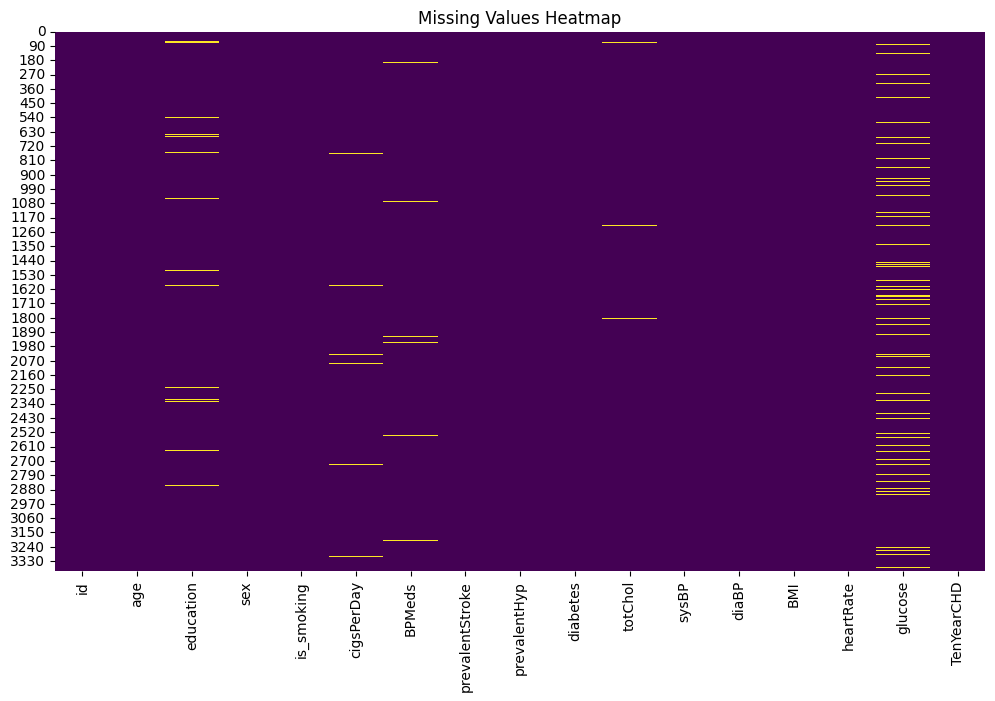

In [555]:
# Visualizing the missing values
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")

From the data we saw that -

*   Only sex and is_smoking columns are in object data type
*   No duplicae values are present in data.
*   There are many missing values for some columns.




# ***2. Understanding Your Variables***

In [556]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [557]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [558]:
# Check Unique Values for each variable.
df.nunique()

,0
id,3390
age,39
education,4
sex,2
is_smoking,2
cigsPerDay,32
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2


# 3. ***Data Wrangling***

In [559]:
# Handling null values
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

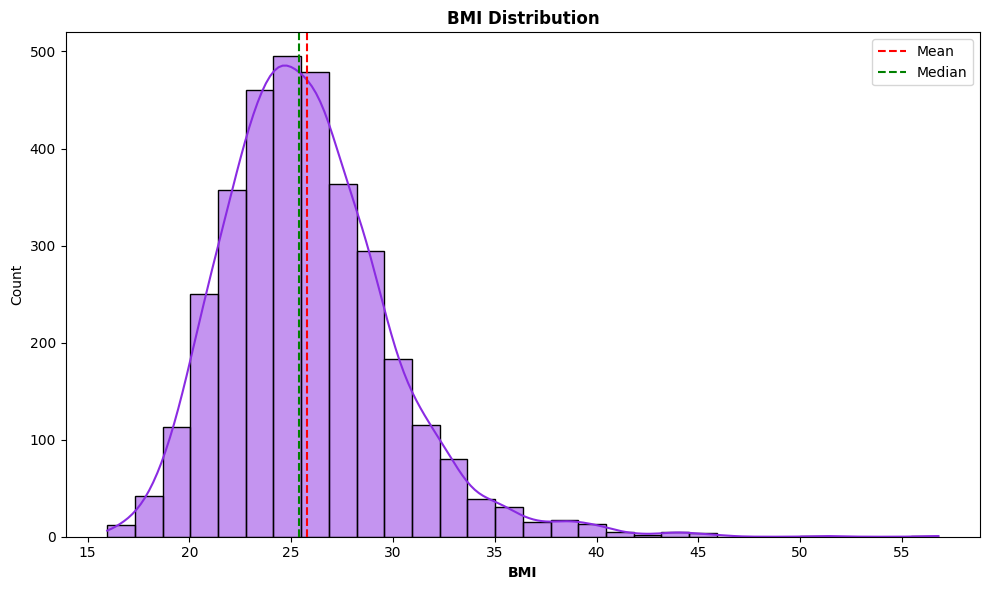

In [560]:
# Checking what would be suitable for filling the missing values of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='#8A2BE2', edgecolor='black')
plt.title('BMI Distribution', fontweight='bold')
plt.xlabel('BMI', fontweight='bold')
plt.ylabel('Count')
plt.axvline(df['BMI'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['BMI'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.tight_layout()
plt.show()

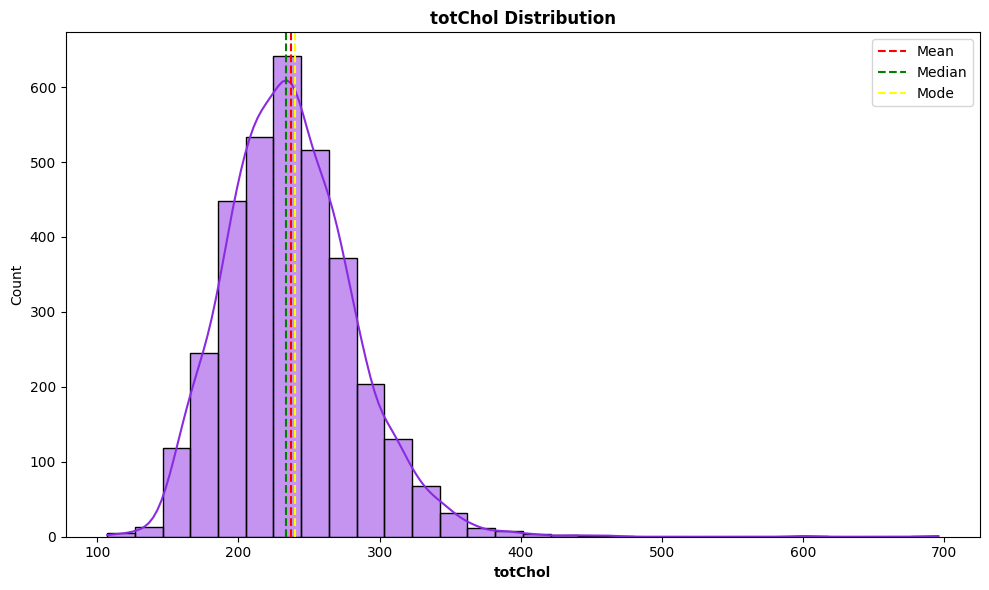

In [561]:
# Checking what would be suitable for filling the missing values of totChol
plt.figure(figsize=(10, 6))
sns.histplot(df['totChol'], bins=30, kde=True, color='#8A2BE2', edgecolor='black')
plt.title('totChol Distribution', fontweight='bold')
plt.xlabel('totChol', fontweight='bold')
plt.ylabel('Count')
plt.axvline(df['totChol'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['totChol'].median(), color='green', linestyle='--', label='Median')
plt.axvline(df['totChol'].mode()[0], color='yellow', linestyle='--', label='Mode')
plt.legend()
plt.tight_layout()
plt.show()

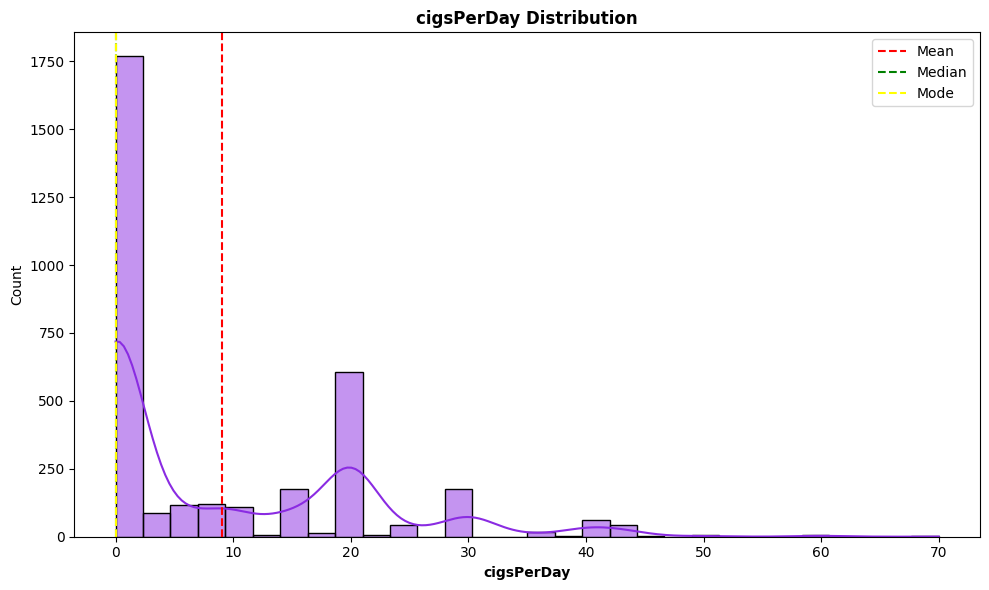

In [562]:
# Checking what would be suitable for filling the missing values of totChol
plt.figure(figsize=(10, 6))
sns.histplot(df['cigsPerDay'], bins=30, kde=True, color='#8A2BE2', edgecolor='black')
plt.title('cigsPerDay Distribution', fontweight='bold')
plt.xlabel('cigsPerDay', fontweight='bold')
plt.ylabel('Count')
plt.axvline(df['cigsPerDay'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['cigsPerDay'].median(), color='green', linestyle='--', label='Median')
plt.axvline(df['cigsPerDay'].mode()[0], color='yellow', linestyle='--', label='Mode')
plt.legend()
plt.tight_layout()
plt.show()

In [563]:
# Replacing the null values of BMI, totChol, cigsPerDay with median.

df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)


In [564]:
# Checking for missing/null values again
df.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [565]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [566]:
# Check if there is any duplicate IDs
condition = bool(df.duplicated(subset = 'id').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


In [567]:
# Checking Outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.7500,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.0000,70.0
education,3390.0,1.946018,1.017568,1.00,1.00,2.00,3.0000,4.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.00,20.0000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.0000,1.0
totChol,3390.0,237.039823,44.994205,107.00,206.00,234.00,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.0000,295.0


In [568]:
# let's check all columns for checking outliers
columns = ['cigsPerDay', 'totChol', 'glucose', 'prevalentHyp', 'prevalentStroke', 'diabetes',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'age']

In [569]:
# let's create a function to check the outliers
def check_outliers(columns,df):

  # use plotly for better plot
  for i in columns:
    fig = px.box(df,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

In [570]:
# Plot the graph
check_outliers(columns,df)



*  Age column has no outliers.
* cigsPerDay has only 2 outliers.
* Rest of the columns contain many outliers.






In [571]:
# Check sex column
df['sex'].value_counts()

,count
sex,
F,1923
M,1467


In [572]:
# Check number of people smoking
df['is_smoking'].value_counts()

,count
is_smoking,
NO,1703
YES,1687


In [573]:
# Checking EDUCATION column count
df['education'].value_counts()

,count
education,
1.0,1478
2.0,990
3.0,549
4.0,373


# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Chart - 1 :- 10-Year CHD Risk by Gender**

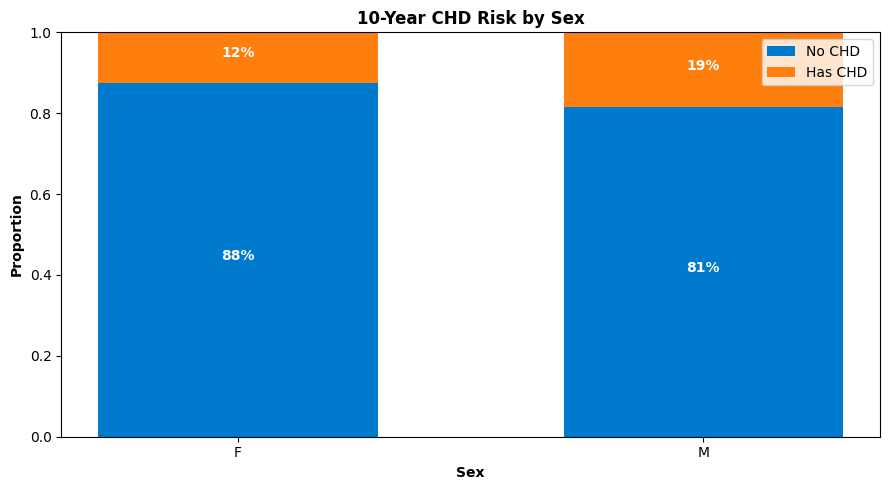

In [574]:
# Create a normalized crosstab of sex vs TenYearCHD (0 = No, 1 = Yes)
sex_chd = pd.crosstab(df['sex'], df['TenYearCHD'], normalize='index')

# Convert index to list to fix the error
categories = sex_chd.index.tolist()
no_chd = sex_chd[0].tolist()
yes_chd = sex_chd[1].tolist()

# Plot
colors = ['#007acc', '#ff7f0e']  # Bold contrasting colors
bar_width = 0.6
x = range(len(categories))

plt.figure(figsize=(9, 5))
plt.bar(x, no_chd, color=colors[0], width=bar_width, label='No CHD')
plt.bar(x, yes_chd, bottom=no_chd, color=colors[1], width=bar_width, label='Has CHD')

# Labels and title
plt.xticks(x, categories)
plt.ylabel('Proportion', fontweight='bold')
plt.xlabel('Sex', fontweight='bold')
plt.title('10-Year CHD Risk by Sex', fontweight='bold')
plt.ylim(0, 1)
plt.legend(loc='upper right')

# Add text labels
for i in range(len(categories)):
    plt.text(i, no_chd[i]/2, f"{no_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, no_chd[i] + yes_chd[i]/2, f"{yes_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


####**Insights from graph -**

*   Higher CHD Risk in Males: 19% of males have CHD compared to only 12% of females.
*  Females have Lower CHD Prevalence: 88% of females are CHD-free vs. 81% of males.
*   Sex as a Risk Factor: Male sex is associated with a higher likelihood of CHD in this dataset.
*  Preventive Focus Needed: Male group may need more targeted preventive healthcare screening.

###**Chart - 2 :- 10-Year CHD Risk by Smoking Status**

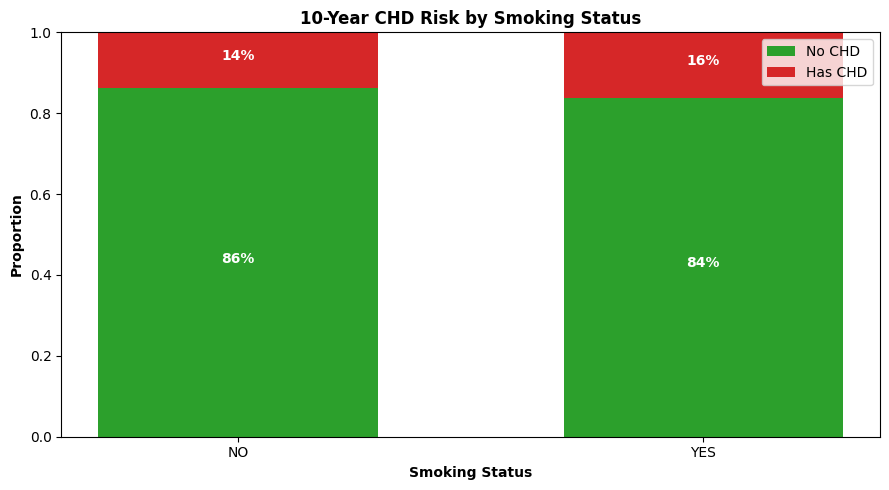

In [575]:
# Create normalized crosstab for smoking status
smoke_chd = pd.crosstab(df['is_smoking'], df['TenYearCHD'], normalize='index')

# Extract data
categories = smoke_chd.index.tolist()
no_chd = smoke_chd[0].tolist()
yes_chd = smoke_chd[1].tolist()

# Plot
colors = ['#2ca02c', '#d62728']  # Green for No CHD, Red for CHD
bar_width = 0.6
x = range(len(categories))

plt.figure(figsize=(9, 5))
plt.bar(x, no_chd, color=colors[0], width=bar_width, label='No CHD')
plt.bar(x, yes_chd, bottom=no_chd, color=colors[1], width=bar_width, label='Has CHD')

# Labels and title
plt.xticks(x, categories)
plt.ylabel('Proportion', fontweight='bold')
plt.xlabel('Smoking Status', fontweight='bold')
plt.title('10-Year CHD Risk by Smoking Status', fontweight='bold')
plt.ylim(0, 1)
plt.legend(loc='upper right')

# Add percentage text inside bars
for i in range(len(categories)):
    plt.text(i, no_chd[i]/2, f"{no_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, no_chd[i] + yes_chd[i]/2, f"{yes_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

####**Insights from graph -**

*   Higher CHD Risk in Smokers: 16% of smokers have CHD, while only 14% of non-smokers have it.
*   Smokers Still Mostly CHD-Free: Majority (84%) of smokers did not develop CHD—still shows some resilience or effect moderation.
*   Smoking Increases Risk: There's a visible 2% increase in CHD risk among smokers.

### **Chart - 3 :- 10-Year CHD Risk by Sex and Smoking**


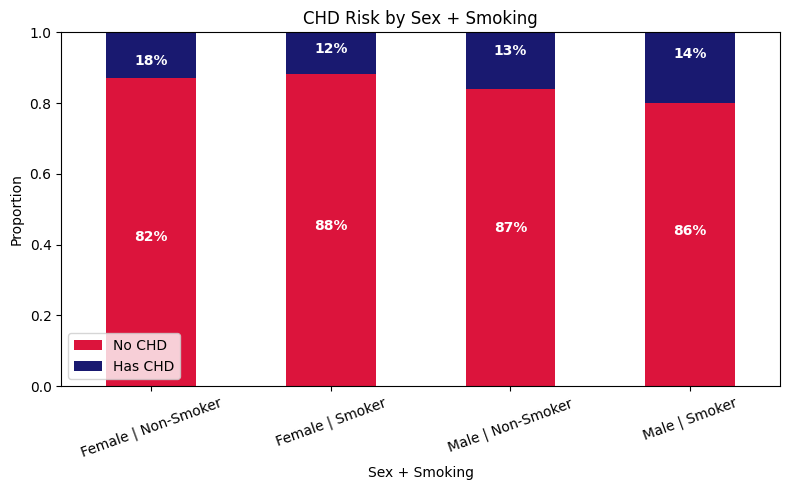

In [581]:
df['sex_smoke'] = df['sex'].map({'M': 'Male', 'F': 'Female'}) + ' | ' + df['is_smoking'].map({'YES': 'Smoker', 'NO': 'Non-Smoker'})
grouped = pd.crosstab(df['sex_smoke'], df['TenYearCHD'], normalize='index')

grouped[[0, 1]].plot(kind='bar', stacked=True, color=['#DC143C', '#191970'], figsize=(8, 5))
plt.title('CHD Risk by Sex + Smoking')
plt.ylabel('Proportion')
plt.xlabel('Sex + Smoking')
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.legend(['No CHD', 'Has CHD'])
# Labels
for i in range(len(categories)):
    plt.text(i, no_chd[i]/2, f"{no_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, no_chd[i] + yes_chd[i]/2, f"{yes_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')
plt.tight_layout()
plt.show()



####**Insights from graph-**

*   Male Smokers Have Highest CHD Risk: 20% of male smokers have CHD—the highest across all groups.
*   Female Smokers = Female Non-Smokers: Surprisingly, CHD risk is similar for female smokers and non-smokers (12–13%).
*   Non-Smoking Males Still at Risk: 16% CHD risk for male non-smokers, higher than all female categories.
*   Combined Risk Factors Matter: Being male and a smoker significantly increases CHD risk.

### **Chart - 4  Age vs CHD Risk**

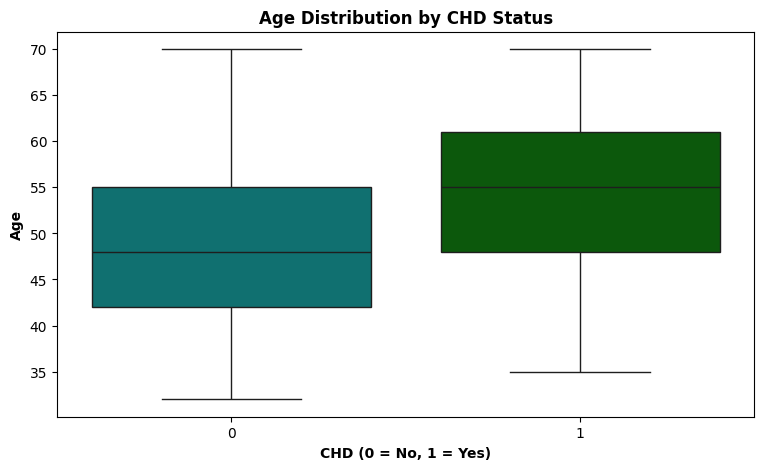

In [577]:
colors = ['#008080', '#006400']
plt.figure(figsize=(9, 5))

sns.boxplot(x='TenYearCHD', y='age', data=df, palette=colors)
plt.title('Age Distribution by CHD Status', fontweight='bold')
plt.xlabel('CHD (0 = No, 1 = Yes)', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.show()

####**Insights from graph-**

*   Higher Median Age: Patients with CHD have a higher median age (~55) compared to those without (~48).
*   Age Range Shift: The entire age distribution for CHD-positive patients is shifted upward.
*   Greater Risk with Age: This suggests CHD risk increases with age.
*   No major outliers: The age ranges are fairly compact with minimal extreme values.

### **Chart - 5 Systolic BP Distribution by CHD**

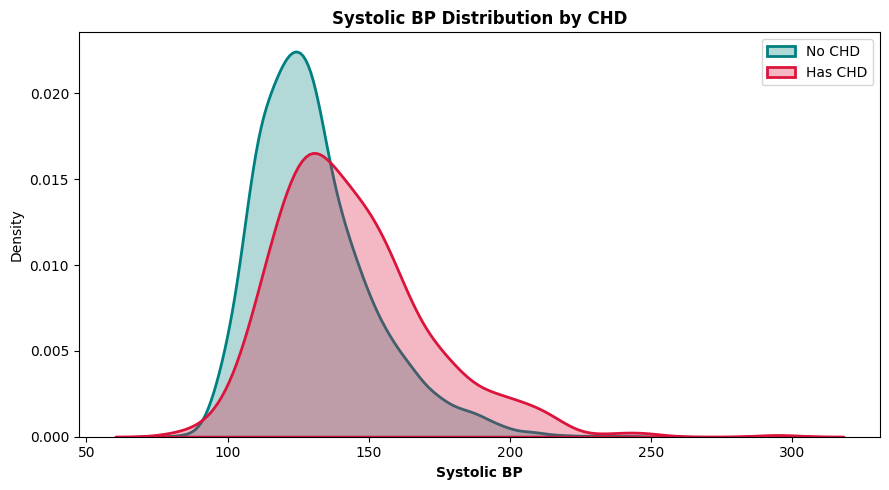

In [578]:
plt.figure(figsize=(9, 5))

# KDE plots
sns.kdeplot(data=df[df['TenYearCHD'] == 0]['sysBP'], label='No CHD', color='#008080', linewidth=2, fill=True, alpha=0.3)
sns.kdeplot(data=df[df['TenYearCHD'] == 1]['sysBP'], label='Has CHD', color='#DC143C', linewidth=2, fill=True, alpha=0.3)

# Labels and title
plt.title('Systolic BP Distribution by CHD', fontweight='bold')
plt.xlabel('Systolic BP', fontweight='bold')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


####**Insights from graph-**

*   Higher Systolic BP: The red curve (CHD) is shifted right, indicating higher systolic BP among CHD patients.
*   Distribution Overlap: There’s an overlap, but CHD patients are more concentrated in the 140–180 range.
*   CHD-BP Link: Higher systolic BP is a clear risk factor for CHD here.
*   CHD group has a longer tail, possibly indicating some very high BP cases.

### **Chart - 6 Diastolic BP Distribution by CHD**

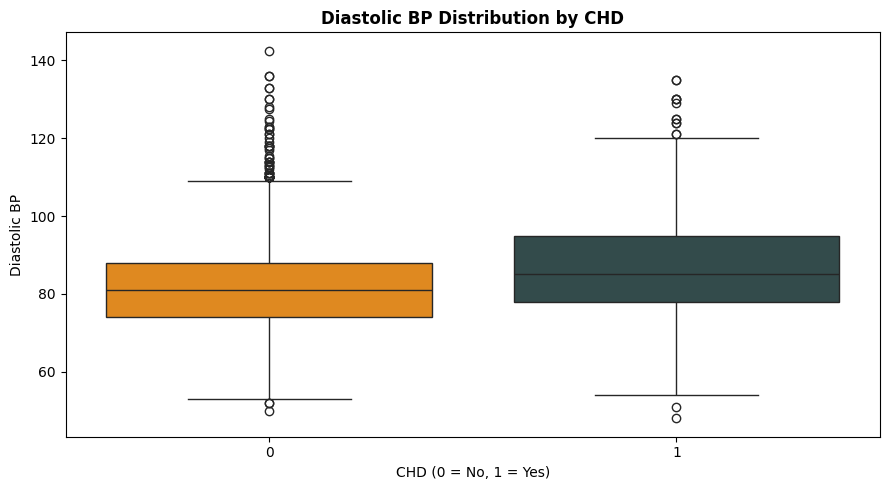

In [579]:
colors = ['#FF8C00', '#2F4F4F']  # Dark orange and dark slate gray
plt.figure(figsize=(9, 5))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df, palette=colors)
plt.title('Diastolic BP Distribution by CHD', fontweight='bold')
plt.xlabel('CHD (0 = No, 1 = Yes)')
plt.ylabel('Diastolic BP')
plt.tight_layout()
plt.show()

####**Insights from graph-**

*   Slightly Higher Median: CHD patients have a slightly higher median diastolic BP.
*   More Outliers: Non-CHD group shows more extreme outliers on the higher side.
*   Tighter Spread in Non-CHD: Diastolic BP is more compact and less variable for CHD patients.



### **Chart - 7 CHD Count by Education Level**

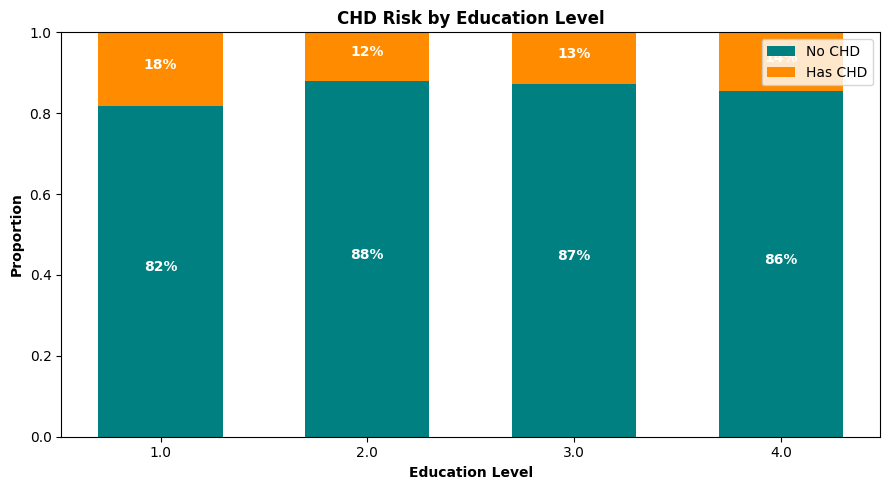

In [580]:
edu_chd = pd.crosstab(df['education'], df['TenYearCHD'], normalize='index')

# Extracting data
categories = edu_chd.index.tolist()
no_chd = edu_chd[0].tolist()
yes_chd = edu_chd[1].tolist()

# Plotting
plt.figure(figsize=(9, 5))
colors = ['#008080', '#FF8C00']
x = range(len(categories))
bar_width = 0.6

plt.bar(x, no_chd, color=colors[0], width=bar_width, label='No CHD')
plt.bar(x, yes_chd, bottom=no_chd, color=colors[1], width=bar_width, label='Has CHD')

# Labels and titles
plt.xticks(x, categories, rotation=0)
plt.ylabel('Proportion', fontweight='bold')
plt.xlabel('Education Level', fontweight='bold')
plt.title('CHD Risk by Education Level', fontweight='bold')
plt.ylim(0, 1)
plt.legend(loc='upper right')

# Add % labels inside bars
for i in range(len(categories)):
    plt.text(i, no_chd[i]/2, f"{no_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, no_chd[i] + yes_chd[i]/2, f"{yes_chd[i]*100:.0f}%", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

####**Insights from graph-**

*  Lower Education = Higher Risk: CHD risk is highest in education level 1 (18%), lowest in level 2 (12%).
*   Inverse Trend: As education level increases, CHD risk slightly decreases.
*   Health Awareness Factor: Implies education may contribute to better heart health awareness.
*   Majority No CHD: Across all groups, the majority (>80%) don’t have CHD, but disparities exist.

### **Chart - 8 Smoking Distribution by Age Group**

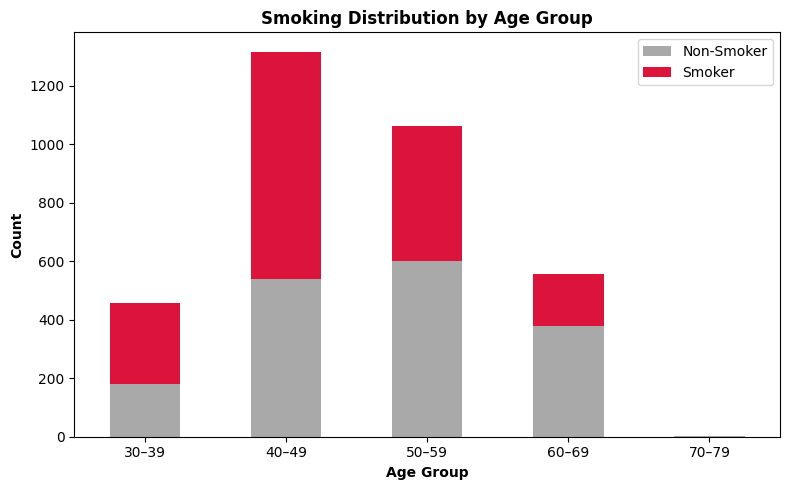

In [582]:
# Create age bins
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count smokers and non-smokers by age group
smoke_counts = pd.crosstab(df['age_group'], df['is_smoking'])

# Plot
smoke_counts.plot(kind='bar', stacked=True, color=['#A9A9A9', '#DC143C'], figsize=(8, 5))
plt.title('Smoking Distribution by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(['Non-Smoker', 'Smoker'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


####**Insights from graph-**

* The 40–49 age group has the highest total number of individuals, with a significant portion being smokers.
*   Smoking prevalence is notably high in the 40–49 and 50–59 age groups, exceeding the number of non-smokers in those groups.
*  Non-smokers dominate in the 60–69 age group, showing a decline in smoking behavior with age.
*  The 70–79 age group has very few individuals represented.

### **Chart - 9 CHD Risk by Diabetes Status**

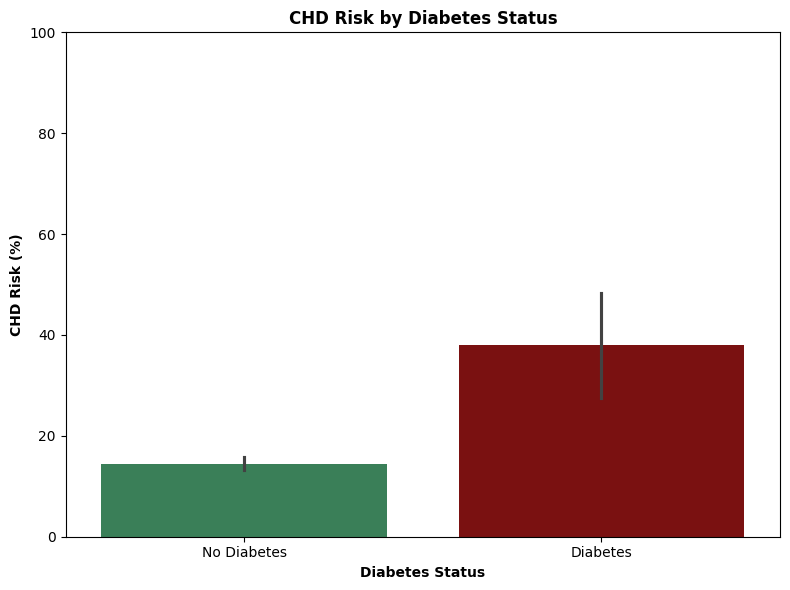

In [583]:
plt.figure(figsize=(8, 6))
dark_colors = ['#2E8B57', '#8B0000']

# Mean of TenYearCHD gives CHD rate; multiply by 100 for percentage
sns.barplot(x='diabetes', y='TenYearCHD', data=df, estimator=lambda x: x.mean() * 100, palette=dark_colors)

plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel('CHD Risk (%)', fontweight='bold')
plt.xlabel('Diabetes Status', fontweight='bold')
plt.title('CHD Risk by Diabetes Status', fontweight='bold')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


####**Insights from graph-**

* Individuals with diabetes have a significantly higher risk (~38%) of Coronary Heart Disease (CHD) compared to those without diabetes (~15%).
*  The error bars show greater variability in CHD risk among diabetics than non-diabetics
*  Diabetes appears to be a strong risk factor for developing CHD.
*  The risk difference highlights the importance of monitoring cardiovascular health in diabetic patients.

### **Chart - 10 Heart Rate Distribution by CHD Status**

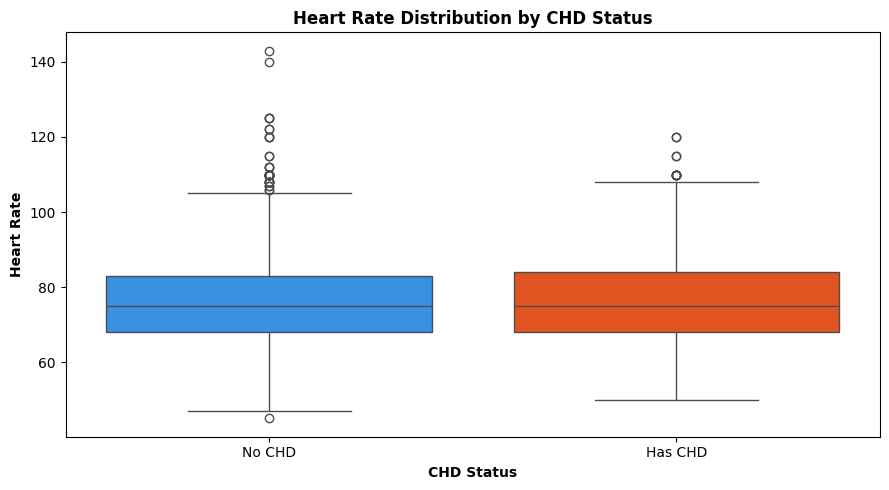

In [584]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='TenYearCHD',
    y='heartRate',
    data=df,
    palette=['#1E90FF', '#FF4500']
)

plt.xticks([0, 1], ['No CHD', 'Has CHD'])
plt.xlabel('CHD Status', fontweight='bold')
plt.ylabel('Heart Rate', fontweight='bold')
plt.title('Heart Rate Distribution by CHD Status', fontweight='bold')
plt.tight_layout()
plt.show()


####**Insights from graph-**

*  Individuals with CHD tend to have a slightly higher median heart rate than those without CHD.
*  Both groups show similar spread (IQR), but individuals without CHD exhibit more extreme outliers on the higher end.
*  The lower quartile heart rate is slightly elevated in CHD patients, suggesting possible resting tachycardia or poor autonomic control.
*  Overall, heart rate alone may not be a strong discriminator of CHD, but subtle differences are observable.

### **Chart - 11 CHD Status by glucose level in blood**

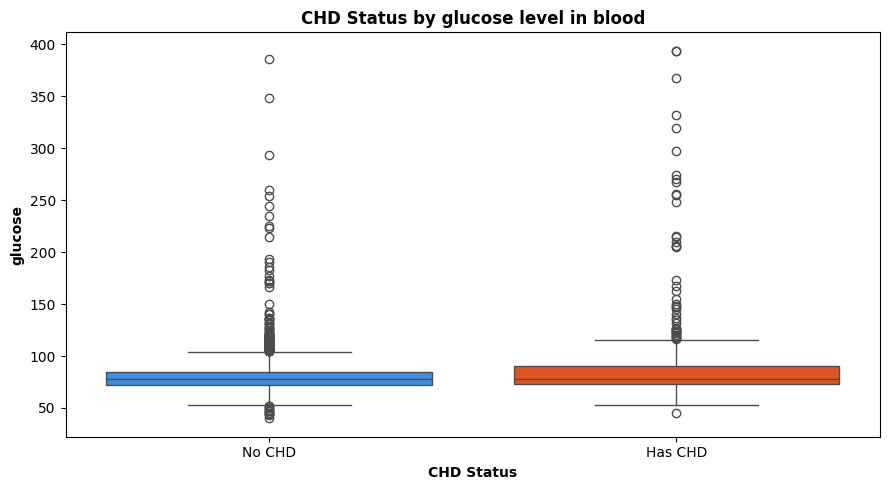

In [585]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='TenYearCHD',
    y='glucose',
    data=df,
    palette=['#1E90FF', '#FF4500']
)

plt.xticks([0, 1], ['No CHD', 'Has CHD'])
plt.xlabel('CHD Status', fontweight='bold')
plt.ylabel('glucose', fontweight='bold')
plt.title('CHD Status by glucose level in blood', fontweight='bold')
plt.tight_layout()
plt.show()

####**Insights from graph-**

*   Individuals with CHD show slightly higher median glucose levels compared to those without CHD.
*   The spread and number of glucose outliers are significantly higher in both groups, especially among CHD-positive individuals.
*   This suggests that elevated glucose levels could be associated with increased CHD risk, although there's overlap in distribution.
*   This suggests that elevated glucose levels could be associated with increased CHD risk, although there's overlap in distribution.




### **Chart - 12 CHD Risk by Stroke History**

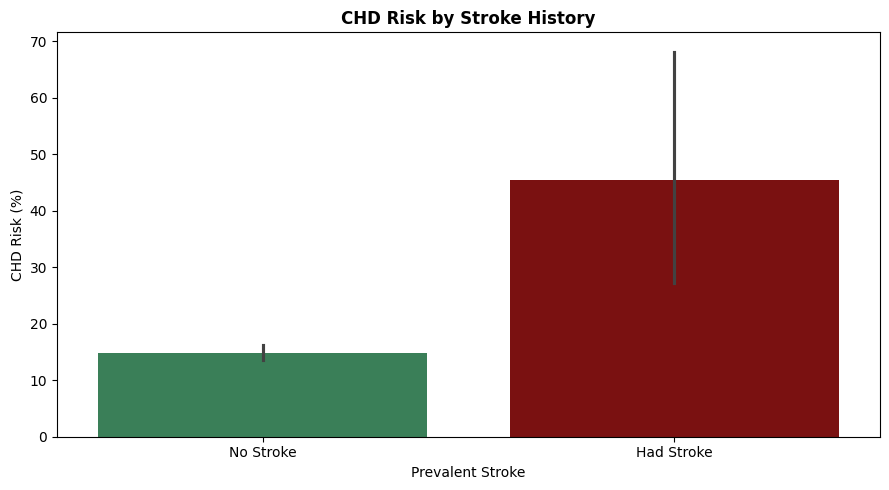

In [586]:
plt.figure(figsize=(9, 5))
sns.barplot(
    x='prevalentStroke', y='TenYearCHD', data=df,
    estimator=lambda x: sum(x)*100/len(x),
    palette=['#2E8B57', '#8B0000']
)
plt.xticks([0, 1], ['No Stroke', 'Had Stroke'])
plt.ylabel('CHD Risk (%)')
plt.xlabel('Prevalent Stroke')
plt.title('CHD Risk by Stroke History', fontweight='bold')
plt.tight_layout()
plt.show()



####**Insights from graph-**

*  Individuals with a history of stroke have a much higher CHD risk (~45%) compared to those without stroke (~15%).
*   This highlights a strong correlation between past strokes and future CHD.
*   The error bar is large for stroke patients, suggesting greater variability in CHD risk among them.
*   Preventing strokes could indirectly help reduce CHD burden in the population.

### **Chart - 13 CHD Risk by Hypertension Status**

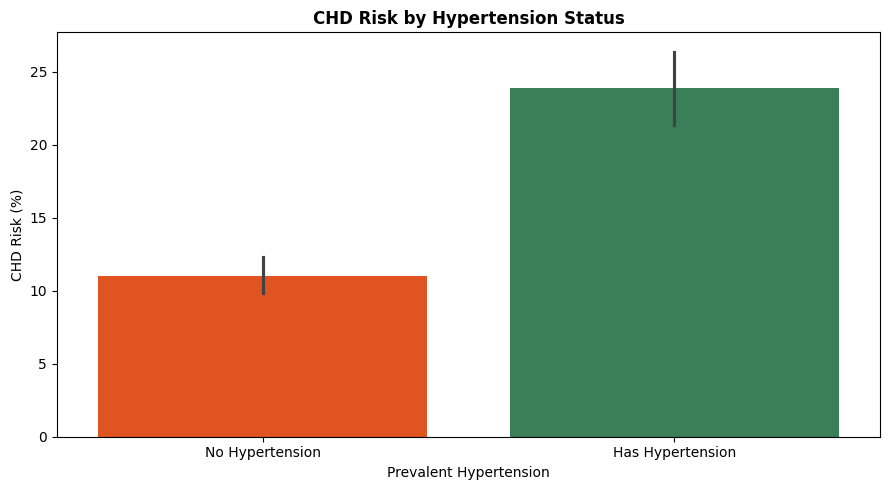

In [587]:
plt.figure(figsize=(9, 5))
sns.barplot(
    x='prevalentHyp', y='TenYearCHD', data=df,
    estimator=lambda x: sum(x)*100/len(x),
    palette=['#FF4500', '#2E8B57']
)
plt.xticks([0, 1], ['No Hypertension', 'Has Hypertension'])
plt.ylabel('CHD Risk (%)')
plt.xlabel('Prevalent Hypertension')
plt.title('CHD Risk by Hypertension Status', fontweight='bold')
plt.tight_layout()
plt.show()


####**Insights from graph-**



*   CHD risk is more than twice as high in individuals with hypertension (~24%) compared to those without it (~11%).
*   This emphasizes that high blood pressure is a major risk factor for developing CHD.
*  Error bars are tighter than stroke chart, suggesting more consistent risk elevation across hypertensive individuals.
*   Managing hypertension could be a critical strategy in CHD prevention efforts.

### **Chart - 14 Correlation Heatmap**

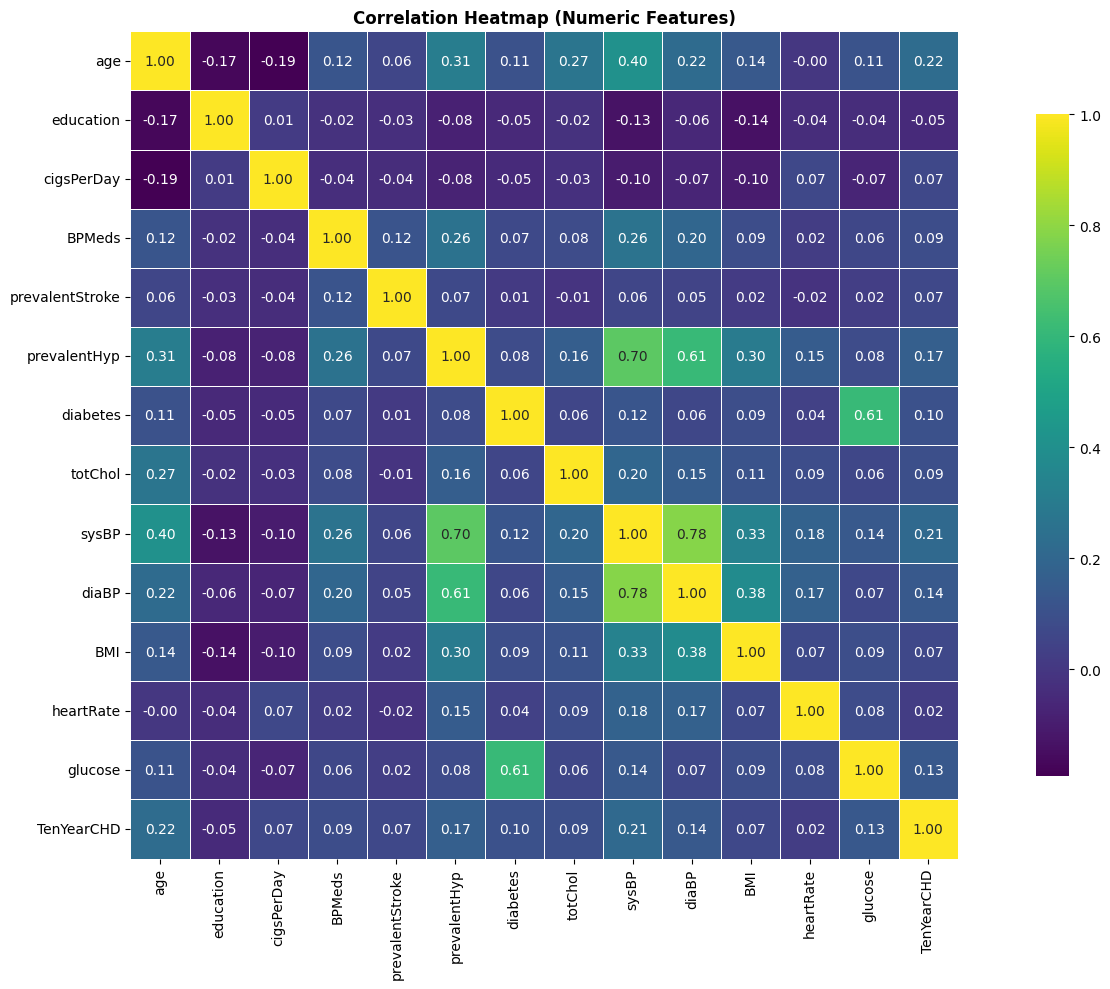

In [588]:
# Select only numeric (int and float) columns, excluding 'id'
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', square=True,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap (Numeric Features)', fontweight='bold', color='black')
plt.tight_layout()
plt.show()


####**Insights from graph-**

*  Age, systolic blood pressure (sysBP), and diastolic blood pressure (diaBP) have moderate positive correlations with TenYearCHD (around 0.2), suggesting these are meaningful CHD risk factors.
*  Diabetes shows a weaker correlation with CHD risk (0.13), likely due to binary classification, but it's still a noteworthy risk factor when combined with other variables (as seen in the bar plot earlier).

### **Chart - 15 Pair Plot**

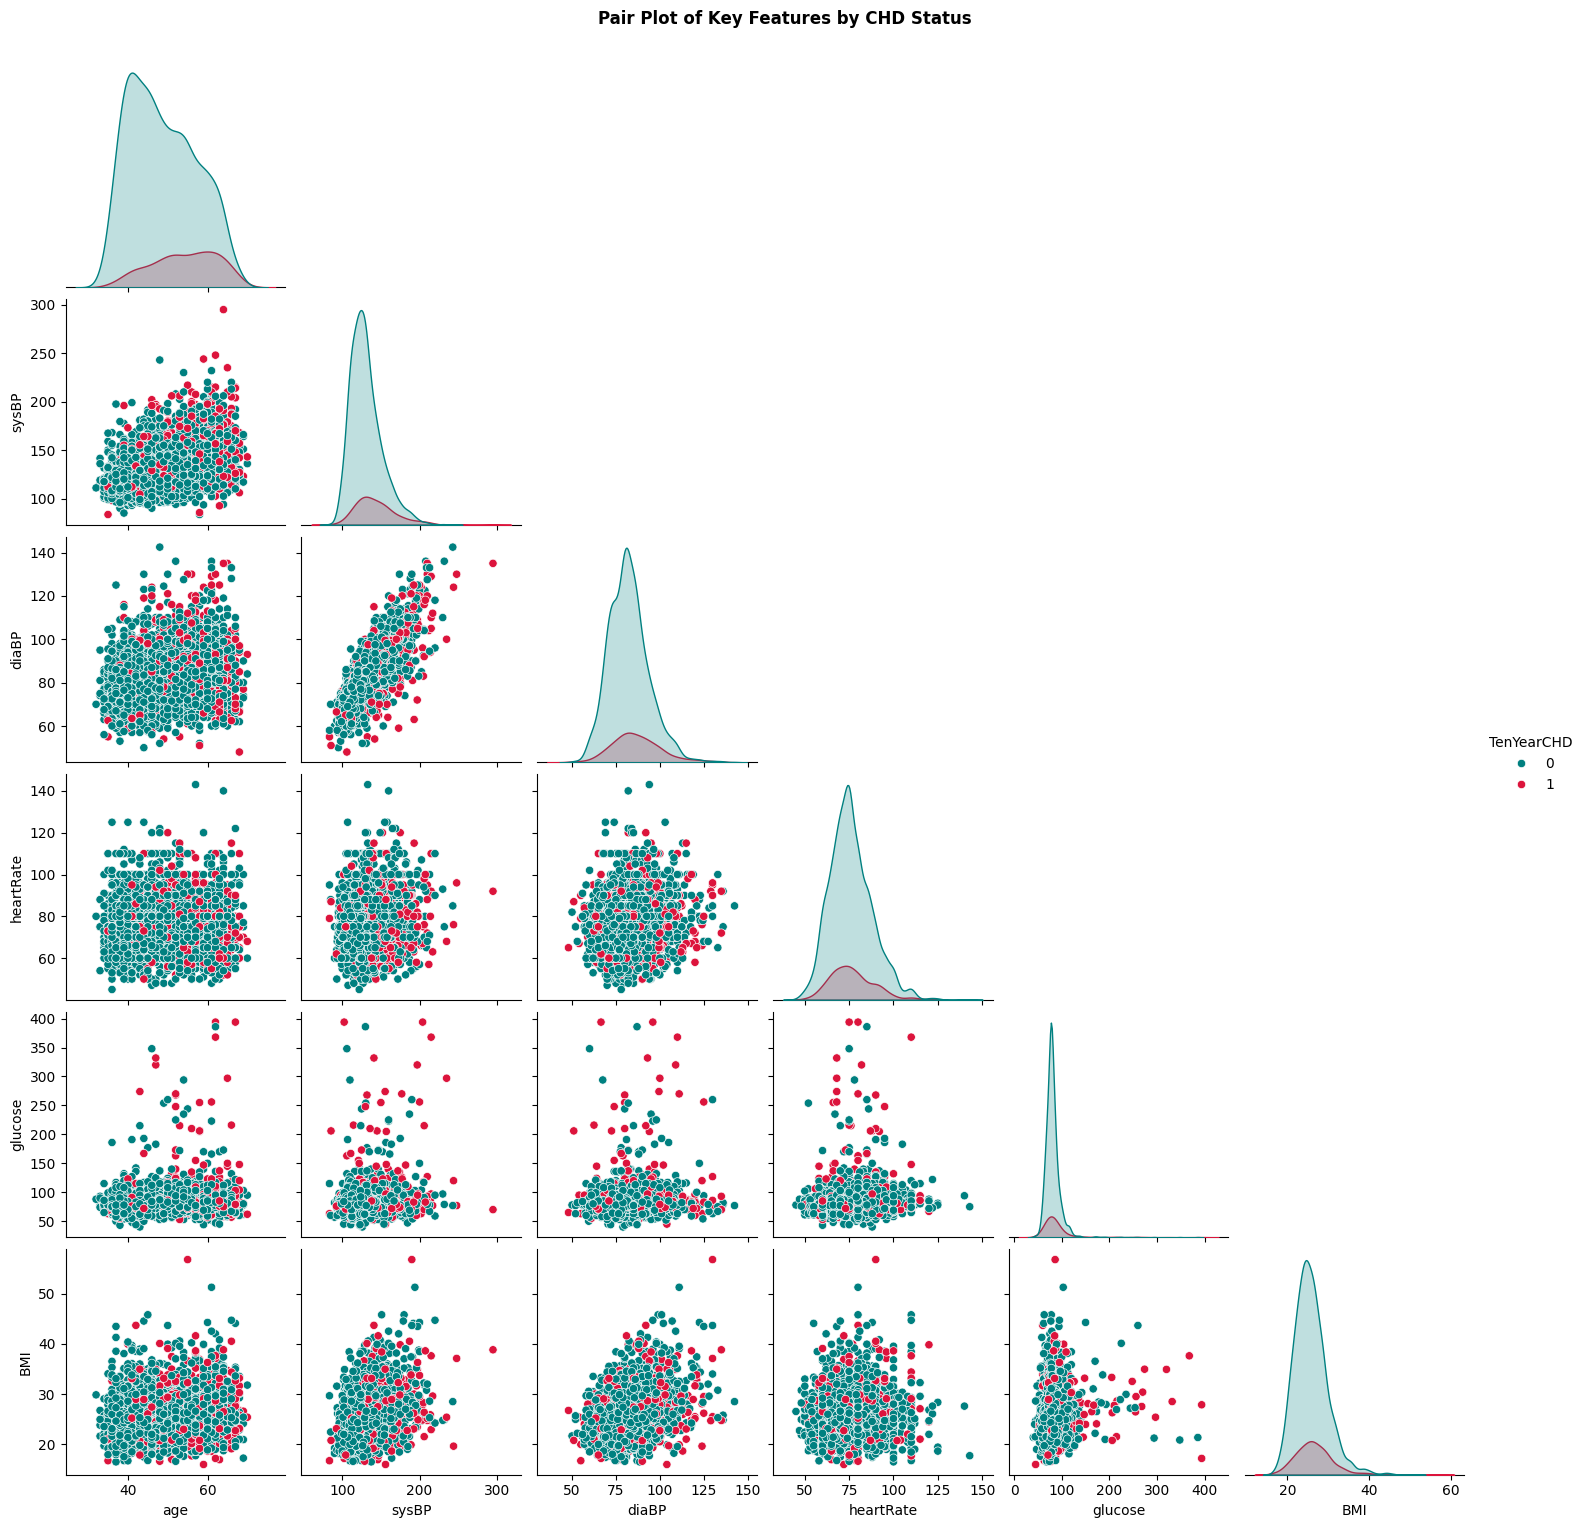

In [589]:
# Choose a subset of important columns for readability
pairplot_cols = ['age', 'sysBP', 'diaBP', 'heartRate', 'glucose', 'BMI', 'TenYearCHD']

# Create pairplot
sns.pairplot(df[pairplot_cols], hue='TenYearCHD', palette=['#008080', '#DC143C'], corner=True)
plt.suptitle('Pair Plot of Key Features by CHD Status', y=1.02, fontweight='bold')
plt.show()


####**Insights from graph-**



*  Red points (patients with CHD) appear more concentrated in the higher ranges of systolic and diastolic blood pressure, indicating a trend toward elevated blood pressure in CHD-positive cases.
*   Heart rate and glucose show greater spread in individuals with CHD, though patterns are less visually distinct than with blood pressure.
*  There is a visible positive trend between age and CHD presence — older individuals are more likely to have CHD (more red points in higher age range).





# ***5. Prepare for Modeling***

### **1. Feature Engineering**

In [590]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    return df


# Apply on your original DataFrame (before train-test split)
df = cap_outliers_iqr(df, columns)



*  The IQR (Interquartile Range) capping method identifies outliers as values that fall below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR, where Q1 and Q3 are the 25th and 75th percentiles, respectively. Instead of removing these outliers, I capped them at the lower and upper limits. This approach preserves all data points while reducing the impact of extreme values on model performance.



In [591]:
# Plot the graph
check_outliers(columns,df)

In [592]:
# Map 'is_smoking' column: 'YES' → 1, 'NO' → 0
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0}).astype(int)


In [593]:
df['is_smoking'].value_counts()

,count
is_smoking,
0,1703
1,1687


### **2- One Hot Encoding**

In [594]:
df['sex'] = pd.get_dummies(df['sex'],drop_first=True)
df['is_smoking'] = pd.get_dummies(df['is_smoking'],drop_first=True)

In [595]:
df['pulsepressure'] = df['sysBP'] - df['diaBP']

In [596]:
df.drop(columns=['sysBP', 'diaBP', 'id', 'sex_smoke', 'age_group'], inplace=True)

In [597]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'pulsepressure'],
      dtype='object')

### **3. Feature Selection**

In [598]:
df = cap_outliers_iqr(df, ['pulsepressure'])

In [599]:
outliers_check = ['cigsPerDay', 'totChol', 'glucose', 'prevalentHyp', 'prevalentStroke', 'diabetes',
       'BMI', 'heartRate', 'age', 'pulsepressure']

In [600]:
check_outliers(outliers_check, df)



*   After Capping there are no outliers in the dataset.



In [601]:
# Define predictor variables and target variable
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

print(X.shape)
print(y.shape)


(3390, 14)
(3390,)


### **4. Check Class Imbalance**

TenYearCHD
0    0.849263
1    0.150737
Name: proportion, dtype: float64


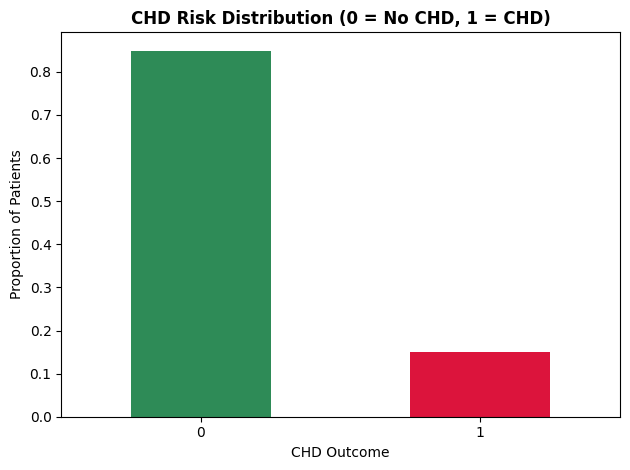

In [602]:
# Check target class distribution for TenYearCHD
chd_dist = df['TenYearCHD'].value_counts(normalize=True)
print(chd_dist)

# Plot the class distribution
chd_dist.plot(kind='bar', color=['#2E8B57', '#DC143C'])
plt.title('CHD Risk Distribution (0 = No CHD, 1 = CHD)', fontweight='bold')
plt.xlabel('CHD Outcome')
plt.ylabel('Proportion of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


*   Around 85% of individuals did not develop CHD, while only 15% did, showing class imbalance.
*   The data is highly imbalanced, so resampling (e.g., SMOTE) is needed to balance the classes.

### **5- Split Training and Test Data**

In [603]:
standard_reg = StandardScaler()
X = standard_reg.fit_transform(X)

In [604]:
# Define function to split data with and without SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [605]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(2712, 14)
Shape of y_train:(2712,)
Shape of X_test:(678, 14)
Shape of y_test:(678,)


In [606]:
from imblearn.over_sampling import SMOTE
# Handling Imbalanced Dataset
smote = SMOTE(random_state=10)

X_resampled, y_resampled = smote.fit_resample(X, y)

print('Original dataset shape:', df.shape)
print('Resampled dataset shape:', X_resampled.shape)

print('Class distribution in the resampled dataset:', y_resampled.value_counts())

Original dataset shape: (3390, 15)
Resampled dataset shape: (5758, 14)
Class distribution in the resampled dataset: TenYearCHD
1    2879
0    2879
Name: count, dtype: int64




*   Now the data is perfectly balanced.


In [607]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'pulsepressure'],
      dtype='object')

In [608]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)

In [609]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(4606, 14)
Shape of y_train:(4606,)
Shape of X_test:(1152, 14)
Shape of y_test:(1152,)


# ***6. Classification Predictive Modeling***

### **1. Logistic Regression**

In [610]:
from sklearn.model_selection import cross_val_score

In [611]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [612]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.001)

In [613]:
# Best parameters
logistic_grid_model.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [614]:
# Best score
logistic_grid_model.best_score_

np.float64(0.6653125093778786)

In [615]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train)
y_test_pred = logistic_grid_model.predict(X_test)

**Model Evaluation**

In [616]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, precision_recall_curve

In [617]:
# Training and testing accuracy
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.6641337386018237
Testing accuracy: 0.6848958333333334


In [618]:
# Predict probabilities
probs = logistic_grid_model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

best_threshold = thresholds[np.argmax(f1_scores)]
y_test_pred = (probs >= best_threshold).astype(int)

# Print results
print("\nThreshold Tuning for Logistic Regression")
print("Best Threshold:", best_threshold)
print("Precision (Logistic):", precision_score(y_test, y_test_pred))
print("Recall (Logistic):", recall_score(y_test, y_test_pred))
print("F1 Score (Logistic):", f1_score(y_test, y_test_pred))
print("ROC AUC (Logistic):", roc_auc_score(y_test, probs))



Threshold Tuning for Logistic Regression
Best Threshold: 0.40875604243427954
Precision (Logistic): 0.5957943925233645
Recall (Logistic): 0.9058614564831261
F1 Score (Logistic): 0.718816067653277
ROC AUC (Logistic): 0.7475837361696227


### **RANDOM FOREST**

In [619]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [620]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train)
y_test_rf_pred = rf_classifier.predict(X_test)

In [621]:
# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.9045138888888888



For Random Forest (Threshold = 0.4):
Confusion Matrix:
[[461 128]
 [ 19 544]]
Precision: 0.8095
Recall: 0.9663
F1 Score: 0.8810
ROC AUC score: 0.8745


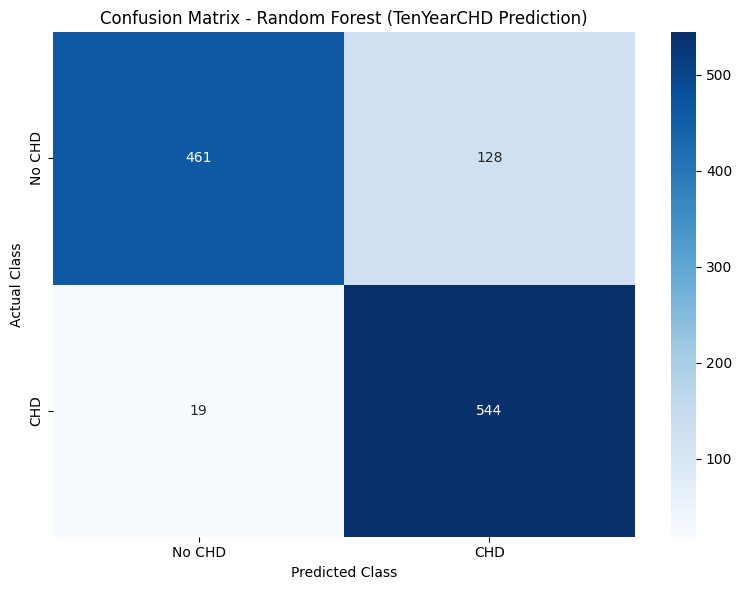

In [622]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Predict probabilities
y_test_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Threshold tuning
threshold = 0.4
y_test_rf_pred = (y_test_probs >= threshold).astype(int)

# Confusion matrix
rf_confusion_mat = confusion_matrix(y_test, y_test_rf_pred)
tn, fp, fn, tp = rf_confusion_mat.ravel()

# Print metrics
print("\nFor Random Forest (Threshold = 0.4):")
print("Confusion Matrix:")
print(rf_confusion_mat)
print(f"Precision: {precision_score(y_test, y_test_rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_rf_pred):.4f}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_test_rf_pred):.4f}")

# Heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_mat, cmap='Blues', annot=True, fmt='d',
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix - Random Forest (TenYearCHD Prediction)', fontsize=12)
plt.tight_layout()
plt.show()


**Random Forest Using hyperparameter tuning**

In [623]:
params_grid = {'n_estimators' : [100,150],'max_depth' : [10,20]}

In [624]:
grid_renf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_renf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 150]},
             scoring='accuracy', verbose=3)

In [625]:
# print best score and best params
print(grid_renf_clf.best_score_)
print(grid_renf_clf.best_params_)

0.8762445428429243
{'max_depth': 20, 'n_estimators': 150}


In [626]:
# Get the predicted classes
y_train_grid_rf_pred = grid_renf_clf.predict(X_train)
y_test_grid_rf_pred = grid_renf_clf.predict(X_test)

In [627]:
# Get the accuracy scores
ref_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train)
ref_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", ref_training_accuracy)
print("The accuracy on test data is ", ref_testing_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.9001736111111112



For Random Forest (GridSearchCV, Threshold = 0.4):
Confusion Matrix:
[[462 127]
 [ 17 546]]

Accuracy: 0.8750
Precision: 0.8113
Recall: 0.9698
F1 Score: 0.8835
ROC AUC score: 0.8771


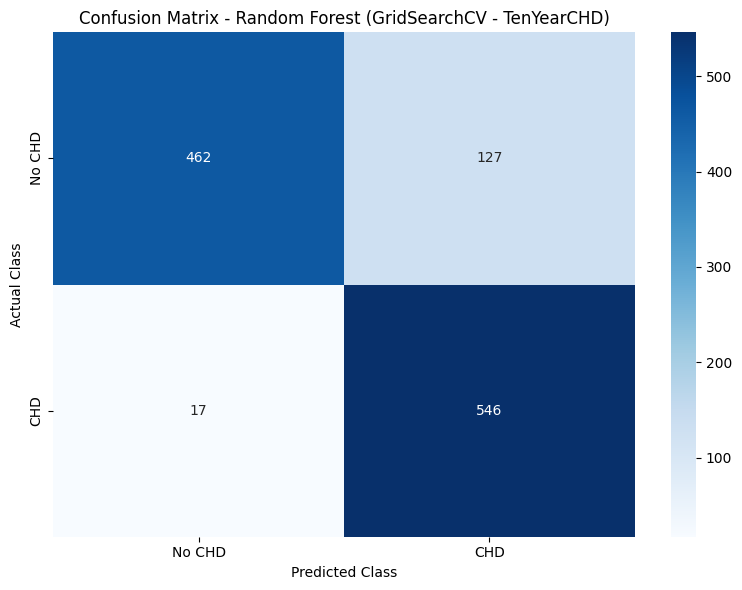

In [628]:
y_test_grid_rf_probs = grid_renf_clf.predict_proba(X_test)[:, 1]

threshold = 0.4
y_test_grid_rf_pred = (y_test_grid_rf_probs >= threshold).astype(int)

# Confusion matrix
grid_rf_confusion_mat = confusion_matrix(y_test, y_test_grid_rf_pred)
tn, fp, fn, tp = grid_rf_confusion_mat.ravel()

# Print metrics
print("\nFor Random Forest (GridSearchCV, Threshold = 0.4):")
print("Confusion Matrix:")
print(grid_rf_confusion_mat)

print(f"\nAccuracy: {accuracy_score(y_test, y_test_grid_rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_grid_rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_grid_rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_grid_rf_pred):.4f}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_test_grid_rf_pred):.4f}")

# Heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(grid_rf_confusion_mat, cmap='Blues', annot=True, fmt='d',
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix - Random Forest (GridSearchCV - TenYearCHD)', fontsize=12)
plt.tight_layout()
plt.show()


### **Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [629]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [630]:
decision_tree_model.best_estimator_


DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

In [631]:
decision_tree_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [632]:
decision_tree_model.best_score_

np.float64(0.7901554404145078)

In [633]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.7518454190186713
Testing accuracy of decision tree classifier: 0.7282986111111112



For Decision Tree Model (Threshold = 0.4):
Confusion Matrix:
[[340 249]
 [ 80 483]]

Accuracy: 0.7144
Precision: 0.6598
Recall: 0.8579
F1 Score: 0.7459
ROC AUC score: 0.7176


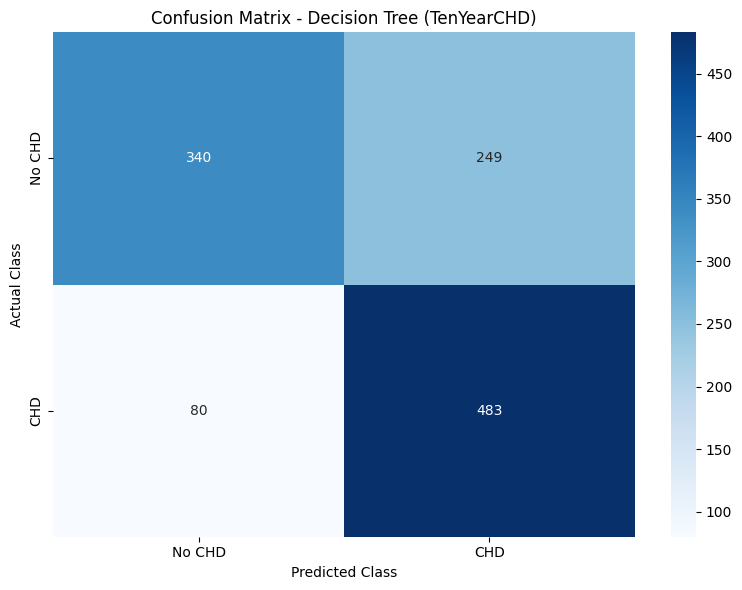

In [634]:
# Predict probabilities
y_test_dtc_probs = decision_tree_model.predict_proba(X_test)[:, 1]

# Apply threshold
threshold = 0.4
y_test_dtc_pred = (y_test_dtc_probs >= threshold).astype(int)

# Confusion matrix
dtc_confusion_mat = confusion_matrix(y_test, y_test_dtc_pred)
tn, fp, fn, tp = dtc_confusion_mat.ravel()

# Print metrics
print("\nFor Decision Tree Model (Threshold = 0.4):")
print("Confusion Matrix:")
print(dtc_confusion_mat)
print(f"\nAccuracy: {accuracy_score(y_test, y_test_dtc_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_dtc_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_dtc_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_dtc_pred):.4f}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_test_dtc_pred):.4f}")


# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dtc_confusion_mat, cmap='Blues', annot=True, fmt='d',
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix - Decision Tree (TenYearCHD)', fontsize=12)
plt.tight_layout()
plt.show()


### **XGBoost**

In [635]:
!pip install scikit-learn==1.4.2

In [636]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [637]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.9978289188015632
Testing Accuracy of XGBClassifier: 0.8949652777777778



For XGBoost Model (Threshold = 0.4):
Confusion Matrix:
[[508  81]
 [ 63 500]]

Accuracy: 0.8750
Precision: 0.8606
Recall: 0.8881
F1 Score: 0.8741
ROC AUC score: 0.8753


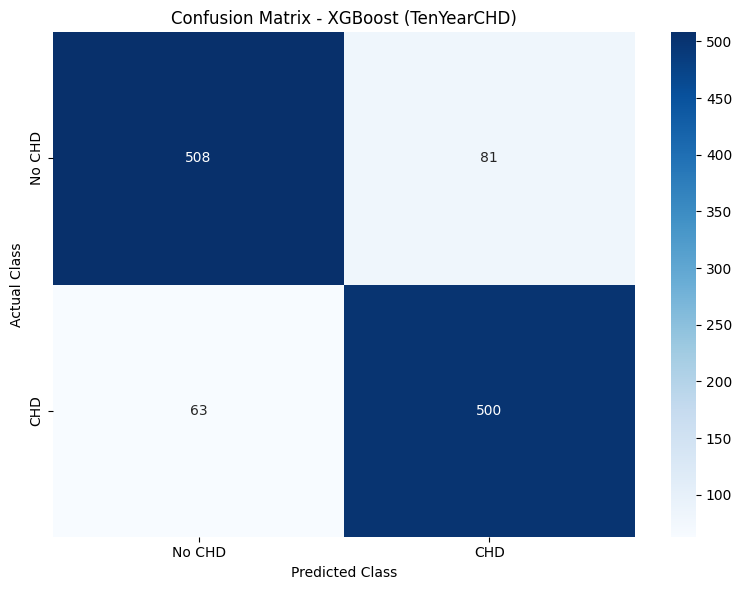

In [638]:
# Predict probabilities
y_test_xgb_probs = xgb.predict_proba(X_test)[:, 1]

# Apply threshold
threshold = 0.4
y_test_xgb_pred = (y_test_xgb_probs >= threshold).astype(int)

# Confusion matrix
xgb_confusion_mat = confusion_matrix(y_test, y_test_xgb_pred)
tn, fp, fn, tp = xgb_confusion_mat.ravel()

# Print metrics
print("\nFor XGBoost Model (Threshold = 0.4):")
print("Confusion Matrix:")
print(xgb_confusion_mat)
print(f"\nAccuracy: {accuracy_score(y_test, y_test_xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_xgb_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_xgb_pred):.4f}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_test_xgb_pred):.4f}")


# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confusion_mat, cmap='Blues', annot=True, fmt='d',
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix - XGBoost (TenYearCHD)', fontsize=12)
plt.tight_layout()
plt.show()

# ***7. Evaluation Matrix***

In [639]:
# Define evaluation matrix
Models = ['Logistic Regression', 'Random Forest', 'Random Forest (Tuned)',
          'Decision Tree Classifier', 'XGBoost Classifier']

train_accuracy = [train_accuracy, rf_training_accuracy, ref_training_accuracy,
                  dtc_training_accuracy, xgb_training_accuracy]

test_accuracy = [test_accuracy, rf_testing_accuracy, ref_testing_accuracy,
                 dtc_testing_accuracy, xgb_testing_accuracy]

precision = [precision_score(y_test, y_test_pred), precision_score(y_test, y_test_rf_pred), precision_score(y_test, y_test_grid_rf_pred),
             precision_score(y_test, y_test_dtc_pred), precision_score(y_test, y_test_xgb_pred)]

recall = [recall_score(y_test, y_test_pred), recall_score(y_test, y_test_rf_pred), recall_score(y_test, y_test_grid_rf_pred),
          recall_score(y_test, y_test_dtc_pred), recall_score(y_test, y_test_xgb_pred)]

f1 = [f1_score(y_test, y_test_pred), f1_score(y_test, y_test_rf_pred), f1_score(y_test, y_test_grid_rf_pred),
      f1_score(y_test, y_test_dtc_pred), f1_score(y_test, y_test_xgb_pred)]

roc_auc = [roc_auc_score(y_test, y_test_pred), roc_auc_score(y_test, y_test_rf_pred), roc_auc_score(y_test, y_test_grid_rf_pred),
           roc_auc_score(y_test, y_test_dtc_pred), roc_auc_score(y_test, y_test_xgb_pred)]

# Create DataFrame
evaluation_matrix = pd.DataFrame({
    'Model': Models,
    'Training Accuracy': train_accuracy,
    'Testing Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC Score': roc_auc
})

# Display the matrix
evaluation_matrix

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.664134,0.684896,0.595794,0.905861,0.718816,0.659213
1,Random Forest,1.000000,0.904514,0.809524,0.966252,0.880972,0.874467
2,Random Forest (Tuned),1.000000,0.900174,0.811293,0.969805,0.883495,0.877092
3,Decision Tree Classifier,0.751845,0.728299,0.659836,0.857904,0.745946,0.717577
4,XGBoost Classifier,0.997829,0.894965,0.860585,0.888099,0.874126,0.875289


*  In medical predictions like CHD (Coronary Heart Disease), it's critical to correctly identify all patients at risk. That means we want to minimize false negatives (i.e., sick people predicted as healthy).
So Recall becomes the most important metric here.
*  **Best Recall: Random Forest (Tuned) – 0.96** :
  This model correctly identifies 96% of all actual CHD cases, making it highly suitable for our use-case.

  While Precision (81%) is slightly lower, it's acceptable because missing a sick patient (false negative) is worse than raising a false alarm (false positive).

  Also, F1 Score (88%) and ROC AUC (0.876) show excellent overall performance.
*   **XGBoost: High Precision, But Lower Recall**

  Precision is highest (86%), but Recall drops to 88%.
  
  This is better if you care more about not raising false alarms, but in our case, missing actual CHD cases is more dangerous.
*  **Logistic Regression & Decision Tree :**
   
   Logistic Regression has decent Recall (90%) but very low Precision (59%), meaning too many false alarms.

   Decision Tree is less stable with lower accuracy and ROC AUC.

# ***8. Model Explainability***

**Using Shap for Features Importance**

In [641]:
# Install shap
!pip install shap

In [642]:
# Import dependancy
from shap import force_plot
from shap import TreeExplainer
from shap import summary_plot

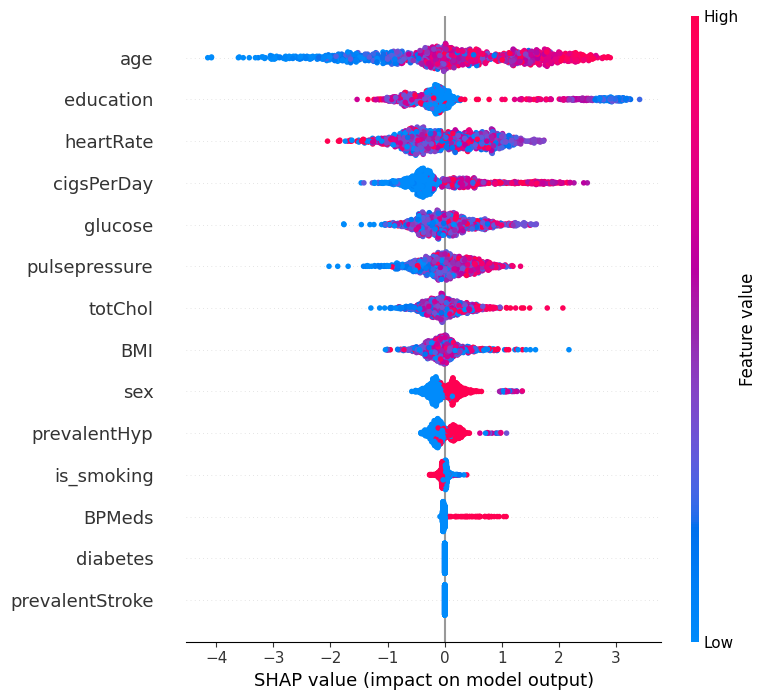

In [643]:
# Recreate X_test as a DataFrame with column names
import shap
X_test_df = pd.DataFrame(X_test, columns=df.drop('TenYearCHD', axis=1).columns)
explainer = shap.Explainer(xgb)

shap_values = explainer(X_test_df)
shap.summary_plot(shap_values, X_test_df)


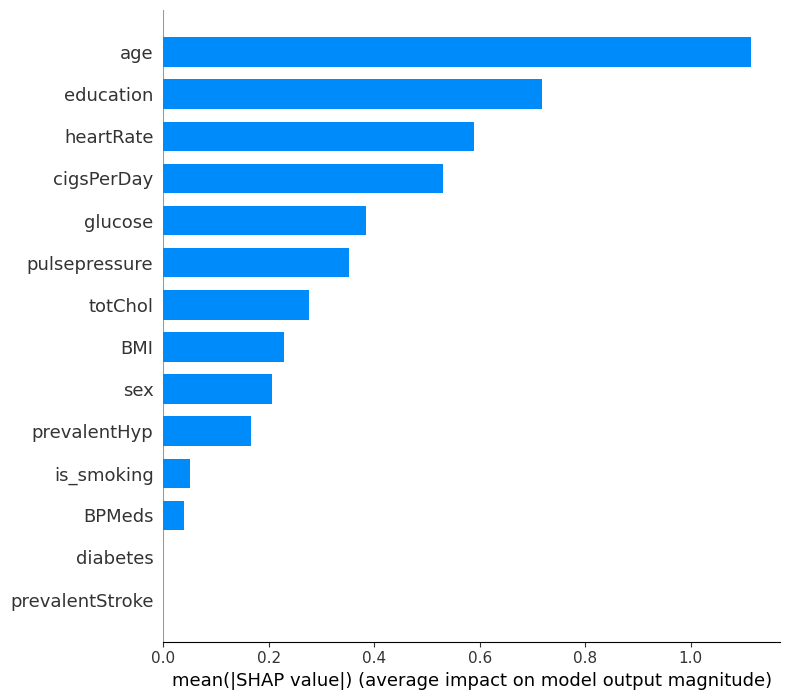

In [644]:
# Shap summary_plot with bar
summary_plot(shap_values, X_train, plot_type="bar")

# **Conclusion**

### **EDA & Model Preparation**


* A detailed Exploratory Data Analysis (EDA) was conducted to understand patterns in cardiovascular risk, revealing strong correlations between CHD and features like age, gender, smoking, diabetes, hypertension, and stroke.
* Age and gender emerged as critical features — CHD risk increased with age, and men showed a consistently higher risk across all age brackets.
*  Smoking behavior (especially in mid-to-late adulthood) significantly contributed to higher CHD incidence. Conditions like diabetes, high blood pressure, and past strokes also increased the risk of CHD.
*  Relationships among continuous variables such as glucose, BMI, and blood pressure were explored through pairplots and heatmaps to detect multicollinearity and trends.
*  Data preprocessing steps included:
  Handling missing values,

  Encoding categorical variables,

  Feature scaling where needed,

  Dropping weak or irrelevant features based on correlation.
* Feature selection and balancing were carefully applied to improve model focus on important predictors without introducing bias or noise
*   We implemented and evaluated multiple machine learning models (Logistic Regression, Decision Tree, Random Forest, and XGBoost), followed by hyperparameter tuning using RandomizedSearchCV to optimize performance.






### **Model Selection**

*  Random Forest (Tuned) achieved the best overall performance with:
  
  Recall = 0.96, which is critical for healthcare — it captures nearly all actual CHD cases, minimizing false negatives.

  F1 Score = 0.88, balancing both precision and recall effectively.

  ROC AUC = 0.876, showing it can separate risk vs non-risk well across thresholds.
*  XGBoost also performed well (F1 = 0.87, ROC AUC = 0.875), but had slightly lower recall than Random Forest, which makes it less ideal when missing a CHD case is risky.

*  Logistic Regression had very high recall (0.90) but very low precision (0.59) — meaning it flagged too many false positives, which may overload healthcare resources.